In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
text3

<Text: The Book of Genesis>

In [3]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

## 利用FreqDist对NLTK.book中的文章制作频率分布和词云

In [5]:
%matplotlib inline
fdist1 = FreqDist(text3)
fdist1

FreqDist({'In': 12,
          'the': 2411,
          'beginning': 5,
          'God': 231,
          'created': 11,
          'heaven': 28,
          'and': 2428,
          'earth': 111,
          '.': 1315,
          'And': 1250,
          'was': 317,
          'without': 9,
          'form': 1,
          ',': 3681,
          'void': 1,
          ';': 605,
          'darkness': 4,
          'upon': 139,
          'face': 47,
          'of': 1358,
          'deep': 6,
          'Spirit': 2,
          'moved': 2,
          'waters': 32,
          'said': 476,
          'Let': 29,
          'there': 116,
          'be': 254,
          'light': 11,
          ':': 238,
          'saw': 57,
          'that': 509,
          'it': 290,
          'good': 44,
          'divided': 10,
          'from': 157,
          'called': 98,
          'Day': 1,
          'he': 648,
          'Night': 1,
          'evening': 10,
          'morning': 20,
          'were': 163,
          'first': 16,
        

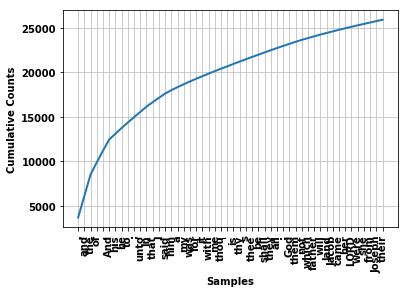

In [6]:
vocabulary1 = fdist1.keys()
fdist1.plot(50, cumulative=True)

In [7]:
#细粒度选择词，选择长度超过7个字符且出现次数超过7次的词
fdist2=FreqDist(text3)
sorted([w for w in set(text3) if len(w) > 7 and fdist2[w] > 7])

['Abimelech',
 'Beersheba',
 'Benjamin',
 'Egyptians',
 'Gomorrah',
 'Manasseh',
 'Padanaram',
 'Peradventure',
 'Therefore',
 'Wherefore',
 'according',
 'answered',
 'appeared',
 'blessing',
 'brethren',
 'children',
 'circumcised',
 'commanded',
 'conceived',
 'covenant',
 'creature',
 'creepeth',
 'creeping',
 'daughter',
 'daughters',
 'departed',
 'everlasting',
 'exceedingly',
 'families',
 'favoured',
 'firmament',
 'firstborn',
 'fruitful',
 'gathered',
 'generations',
 'journeyed',
 'multiply',
 'offering',
 'possession',
 'presence',
 'returned',
 'righteous',
 'servants',
 'speckled',
 'themselves',
 'therefore',
 'together',
 'youngest']

In [8]:
# 双连词
text3.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


## 生成词云

In [15]:
string = open('wiki_00.txt','r',encoding='utf-8').read()

In [21]:
font = r'SimHei.ttf'

In [22]:
wordcloud = WordCloud(font_path=font,
                      background_color='white',
                     width=1000,
                     height=860,
                     margin=2).generate(string)

(-0.5, 999.5, 859.5, -0.5)

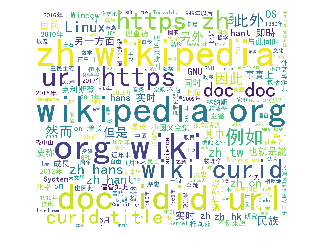

In [23]:
plt.imshow(wordcloud)
plt.axis('off')

## 从网页抓取文字 进行词云统计

In [53]:
import requests
text = requests.get('https://www.douban.com/').text
text

'<!DOCTYPE HTML>\n<html lang="zh-cmn-Hans" class="">\n<head>\n<meta charset="UTF-8">\n<meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n<meta name="description" content="提供图书、电影、音乐唱片的推荐、评论和价格比较，以及城市独特的文化生活。">\n<meta name="keywords" content="豆瓣,广播,登陆豆瓣">\n<meta property="qc:admins" content="2554215131764752166375" />\n<meta property="wb:webmaster" content="375d4a17a4fa24c2" />\n<meta name="mobile-agent" content="format=html5; url=https://m.douban.com">\n<title>豆瓣</title>\n<script>\nfunction set_cookie(t,e,o,n){var i,a,r=new Date;r.setTime(r.getTime()+24*(e||30)*60*60*1e3),i="; expires="+r.toGMTString();for(a in t)document.cookie=a+"="+t[a]+i+"; domain="+(o||"douban.com")+"; path="+(n||"/")}function get_cookie(t){var e,o,n=t+"=",i=document.cookie.split(";");for(e=0;e<i.length;e++){for(o=i[e];" "==o.charAt(0);)o=o.substring(1,o.length);if(0===o.indexOf(n))return o.substring(n.length,o.length).replace(/\\"/g,"")}return null}window.Douban=window

In [54]:
import re
def tokenize(string): 
    return ''.join(re.findall('[\u4e00-\u9fa5]+', string))

In [55]:
zhongwen = tokenize(text)
zhongwen

'提供图书电影音乐唱片的推荐评论和价格比较以及城市独特的文化生活豆瓣广播登陆豆瓣豆瓣登录豆瓣读书豆瓣电影豆瓣音乐豆瓣小组豆瓣同城豆瓣豆瓣时间豆瓣豆品豆瓣书籍电影音乐小组小站成员搜索登录邮箱手机号密码帮助登录豆瓣注册帐号记住我微信登录微信登录微博登录微博登录豆瓣下载豆瓣扫码直接下载热门话题去话题广场视频这座城市的博物馆新话题记忆里最难忘的圣诞节广告品牌话题人浏览唱片封面人浏览宠物给你的生活带来了什么变化新话题你所见闻的江湖智慧人浏览视频拍段王家卫风格的小片视频话题人浏览热点内容更多清明贰张照片圃生厨房自己动手丰衣足食张照片吃货日记美味博物馆张照片台湾之城市篇张照片专访汪民安对艺术而言创造性和杰作有时候诞生于混乱界面文化的日记边缘的少数人的艺术只能在一起抱团取暖这在那个时候是克服艺术孤独的最好这一年我吃掉了个噩梦我和父亲相依为命的时光无尽的秋气残酷之下记录生存美学在广西游来游去在女巫镇过万圣节日本七夕从传说到现代在这里爸爸变成了离开水的鱼手绘游记滇西南之行享受宁静的夏日时光豆瓣时间热门专栏更多会说会写会工作天职场沟通特训营会说会写会工作天职场沟通特训营成长营名师带入门天工笔画研习课名师带入门天工笔画研习课成长营一个作家的养成写作成长营名师直播课精选一个作家的养成写作成长营名师直播课精选音频专栏黑泽明与杨德昌焦雄屏电影大师手册黑泽明与杨德昌焦雄屏电影大师手册音频专栏古典音乐的奇幻之旅从入门到上瘾的堂课古典音乐的奇幻之旅从入门到上瘾的堂课音频专栏花知道答案中日名师插花课花知道答案中日名师插花课视频专栏倍人生戴锦华大师电影课倍人生戴锦华大师电影课音频专栏花鸟鱼虫的生活意见博物君的自然笔记花鸟鱼虫的生活意见博物君的自然笔记音频专栏美剧大爆炸创作脑洞与文化密码美剧大爆炸创作脑洞与文化密码音频专栏哲学闪耀时不一样的西方哲学史哲学闪耀时不一样的西方哲学史音频专栏视频瓣嘴观影会客厅电影影讯购票选电影电视剧排行榜分类影评预告片问答影片分类更多爱情爱情喜剧喜剧剧情剧情动画动画科幻科幻动作动作经典经典悬疑悬疑犯罪犯罪青春青春惊悚惊悚文艺文艺搞笑搞笑励志励志纪录片纪录片战争战争恐怖恐怖黑色幽默黑色幽默美国美国日本日本香港香港英国英国中国中国韩国韩国法国法国中国大陆中国大陆台湾台湾意大利意大利近期热门更多网络谜踪悲伤逆流成河大象席地而坐碟中谍全面瓦解找到你巴斯特斯克鲁格斯的歌谣摄影机不要停一个明

In [56]:
import jieba
word_split_jieba = jieba.cut(zhongwen,cut_all=True)
word_split_jieba

<generator object Tokenizer.cut at 0x0000019AA00C5468>

In [57]:
word_space = ' '.join(word_split_jieba)

In [88]:
# 设置背景 从网页上爬取数据
from PIL import Image
import numpy as np
from wordcloud import STOPWORDS, ImageColorGenerator 
img = np.array(Image.open('ailisi.png'))
background_Image = plt.imread('ailisi.png')

In [106]:
second_wordcloud = WordCloud(background_color='white', #设置背景颜色
                            mask=img, #背景图片
                             width = 1000,
                             height=800,
                            max_words=100, #设置最大显示的词数
                            stopwords=STOPWORDS, #设置停用词
                            font_path=font, #设置字体格式
                            max_font_size=100, #设置字体最大值
                            random_state=50, #设置随机生成状态，配色数量
                            )

In [107]:
second_wordcloud.generate_from_text(word_space)

(-0.5, 599.5, 799.5, -0.5)

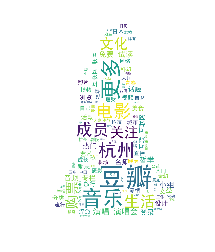

In [108]:
plt.imshow(second_wordcloud)
plt.axis('off')

In [109]:
second_wordcloud.to_file('dream.jpg')

In [110]:
# 改变字体颜色
img_colors = ImageColorGenerator(background_Image) 

In [111]:
second_wordcloud.recolor(color_func=img_colors) 

(-0.5, 599.5, 799.5, -0.5)

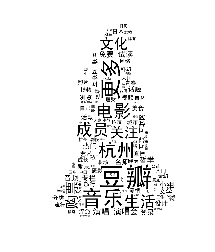

In [112]:
plt.imshow(second_wordcloud)
plt.axis('off')

In [113]:
second_wordcloud.to_file('dream1.jpg')